# Курсовой проект для курса "Python для Data Science" на тему                           "Построение модели для предсказания цен на квартиры в г. Москва"


<a href="https://imgflip.com/gif/344fe2"><img src="https://i.imgflip.com/344fe2.gif" title="made at imgflip.com"/></a>

  
|**Student**| **Faculty**|
|-------|:------:|
|_Zamolotskii Dmitrii_|_Big DATA_|

# Задание:
### Используя данные из train.csv, построить модель для предсказания цен на недвижимость (квартиры). С помощью полученной модели предсказать цены для квартир из файла test.csv.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

pd.options.display.max_columns = 50
%matplotlib inline
import matplotlib.style as style
style.use('fivethirtyeight')

In [2]:
import warnings 

In [3]:
warnings.filterwarnings('ignore')

#### Загрузим базу данных по недвижимости

In [4]:
data = pd.read_csv('input/train.csv')

#### Посмотрим data set, с которыми будем работать

In [5]:
data.shape

(10000, 20)

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,8383.407700,4859.019020,0.000000,4169.500000,8394.500000,12592.500000,1.679800e+04
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,2.090000e+02
Rooms,10000.0,1.890500,0.839512,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.315775,21.058732,1.136859,41.774881,52.513310,65.900625,6.410652e+02
LifeSquare,7887.0,37.199645,86.241209,0.370619,22.769832,32.781260,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.560917,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.775974,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218671e-01


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [8]:
data.index

RangeIndex(start=0, stop=10000, step=1)

In [9]:
data.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [10]:
columns = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2']

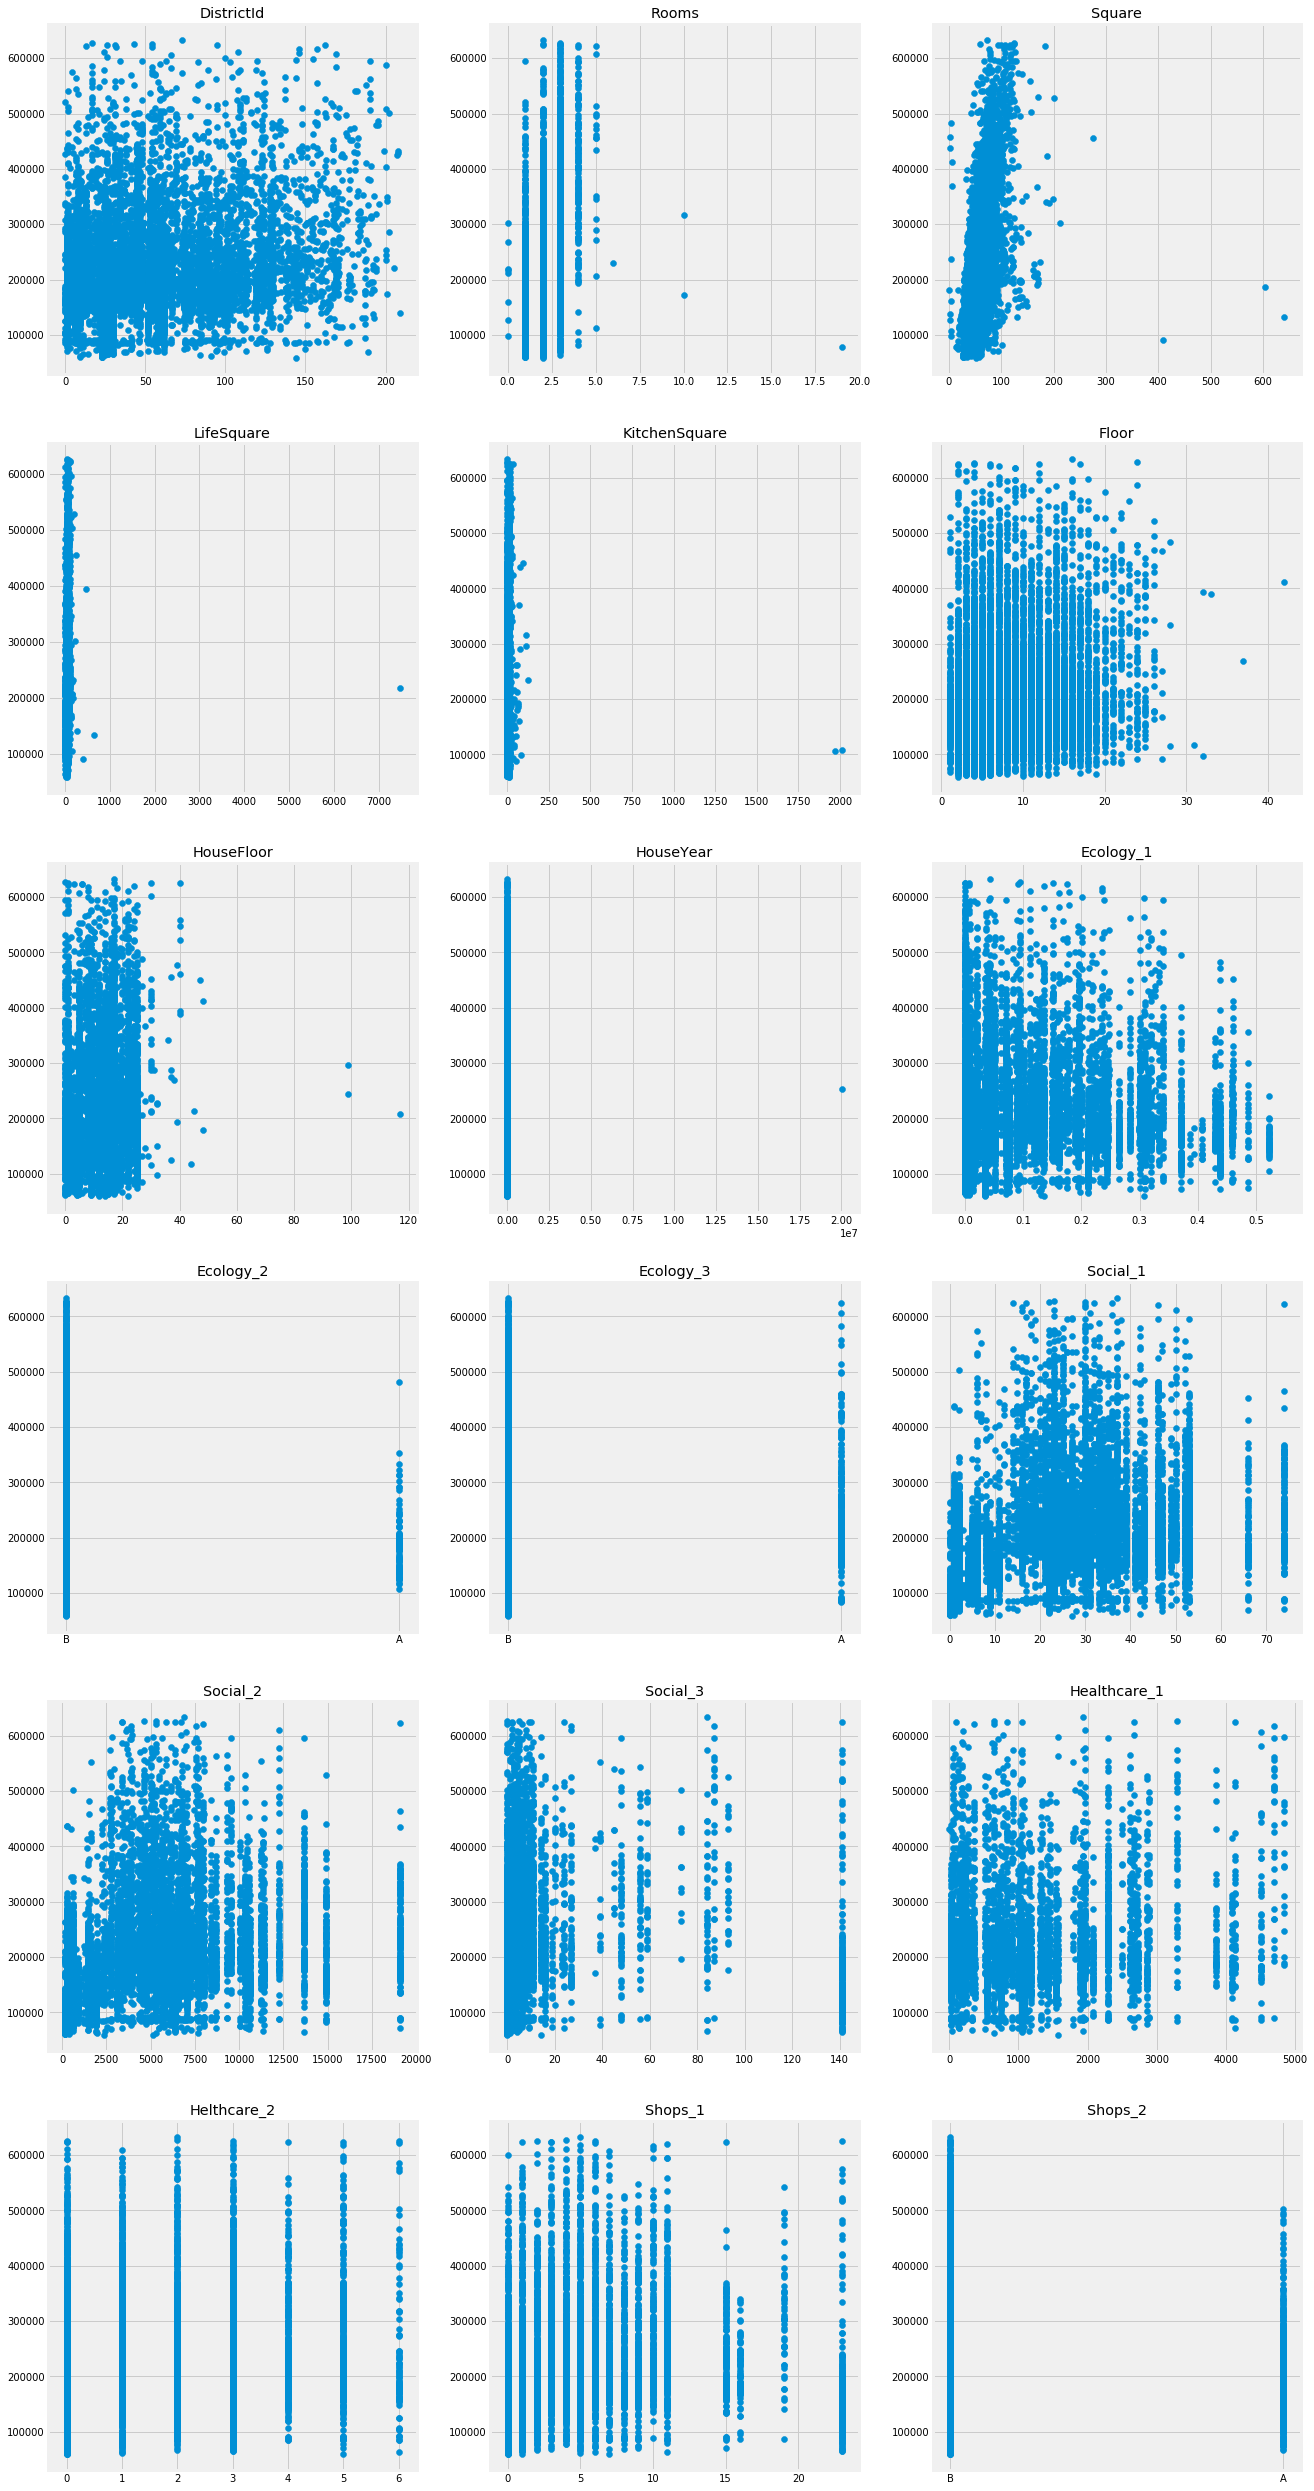

In [11]:
fig, ax = plt.subplots(nrows=6, ncols=3)
ax = ax.flatten()
for i, j in enumerate(columns):
    ax[i].scatter(data[j], data['Price'])
    ax[i].set_title(j)
fig.set_size_inches(20, 45)
plt.subplots_adjust(wspace=0.2, hspace=0.2)

# Train_test_split

In [12]:
train, valid = train_test_split (data, test_size=0.3, random_state=42)

In [13]:
train.shape

(7000, 20)

In [14]:
valid.shape

(3000, 20)

In [15]:
valid.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
6252,3702,21,2.0,48.812195,34.679779,5.0,5,5.0,1963,0.034331,B,B,25,5487,3,NaN,0,4,B,181530.459031
4684,12848,61,3.0,81.103039,49.310278,8.0,4,4.0,1960,0.298205,B,B,16,4048,3,NaN,1,3,B,260456.004692
1731,2239,6,3.0,82.882978,3.977650,1.0,8,17.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,219945.304640
4742,15611,23,1.0,33.863324,29.993297,0.0,5,4.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,66883.280318
4521,5634,52,1.0,43.095135,NaN,1.0,10,17.0,1977,0.371149,B,B,34,7065,1,750.0,2,5,B,114086.065201


# Cleaning
Произведем анализ и изменения данных из нашего data set. 
Полученные, повторяемые изменения будем записывать в функции 
для автоматической обработки данных.

#### Floor
Анализ и обработка данных показали, что вариант, когда Floor > HouseFloor, является ошибкой. Это похоже связанной с тем, что при заполнении Floor часто путали с HouseFloor.

Самое высокое здание в Москве имеет 95 этажей "Башня Федерация", соответственно этажность более 95 этажей будем менять на значение Floor=95. (Источник: https://is.gd/dggj6n).
Значение Floor, согласно Постановление Правительства РФ от 28.01.2006 N 47 ч.II п.24, не может быть в подвале или в цоколе. В тренеровочных данных min = 1. Но, для тестовых данных буду учитывать этот момент в функции, где "0" заменим на "1".
HouseFloor = 0 будем считать за ошибку. 
В таких случаях, будем приравнивать HouseFloor к значению Floor.

In [16]:
data['Floor'].unique()

array([ 7,  8, 11,  5,  3, 14,  9, 13,  1,  6,  4, 16, 12, 15, 19,  2, 17,
       20, 10, 18, 26, 23, 22, 24, 21, 25, 32, 28, 27, 42, 31, 37, 33],
      dtype=int64)

In [17]:
train.loc[train['HouseFloor'] < train['Floor']].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2603,5621,23,3.0,163.495333,161.504222,12.0,5,3.0,1977,0.014073,B,B,2,475,0,NaN,0,0,B,207007.956663
1579,16258,48,3.0,96.056784,98.152802,1.0,15,1.0,2017,0.041125,B,B,46,9515,5,NaN,1,10,B,524365.550705
5753,3766,62,3.0,127.417560,NaN,0.0,9,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,282877.332154
3548,11463,129,3.0,72.953912,39.478723,9.0,16,15.0,1991,0.460556,B,B,20,4386,14,NaN,1,5,B,358129.914474
2726,9347,27,1.0,46.513651,21.032802,14.0,7,6.0,1977,0.075424,B,B,11,3097,0,NaN,0,0,B,124345.245905


In [18]:
  train.loc[train['HouseFloor'] < train['Floor']].head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2603,5621,23,3.0,163.495333,161.504222,12.0,5,3.0,1977,0.014073,B,B,2,475,0,NaN,0,0,B,207007.956663
1579,16258,48,3.0,96.056784,98.152802,1.0,15,1.0,2017,0.041125,B,B,46,9515,5,NaN,1,10,B,524365.550705
5753,3766,62,3.0,127.417560,NaN,0.0,9,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,282877.332154
3548,11463,129,3.0,72.953912,39.478723,9.0,16,15.0,1991,0.460556,B,B,20,4386,14,NaN,1,5,B,358129.914474
2726,9347,27,1.0,46.513651,21.032802,14.0,7,6.0,1977,0.075424,B,B,11,3097,0,NaN,0,0,B,124345.245905
477,8849,45,1.0,63.419553,2.286357,1.0,3,1.0,1977,0.195781,B,B,23,5212,6,NaN,3,2,B,325600.765809
1777,15980,1,1.0,42.106365,41.782263,1.0,15,1.0,2019,0.007122,B,B,1,264,0,NaN,0,1,B,138632.726757
468,12189,28,3.0,76.205998,46.656823,10.0,18,17.0,2000,0.333892,B,B,30,6564,1,NaN,0,0,B,361460.801718
5368,15597,169,2.0,68.896696,5.336872,1.0,11,1.0,2016,0.178917,B,B,18,3594,4,192.0,1,5,B,338780.798345
3881,13291,44,2.0,48.003717,32.700670,5.0,7,5.0,1961,0.036122,B,B,24,4378,0,1036.0,1,1,B,180646.782352


In [19]:
def clean_floor(df):
    df['HouseFloor_2'] = df['HouseFloor']
    df['Floor_2'] = df['Floor']
    df.loc[df['HouseFloor'] < df['Floor'], 'Floor_2'] = df['HouseFloor']
    df.loc[df['HouseFloor'] < df['Floor'], 'HouseFloor_2'] = df['Floor']
    df.HouseFloor = df.HouseFloor_2
    df.Floor = df.Floor_2
    df = df.drop(['HouseFloor_2', 'Floor_2'], axis=1)
    df.loc[df['HouseFloor'] > 95, 'HouseFloor'] = 95
    df.loc[df['Floor'] < 1, 'Floor'] = 1
    return df

In [20]:
#train = clean_floor(train)

In [21]:
train.loc[(train['Floor']<1)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


####  Rooms
Все квартиры в датасете жилые. Вариант, что в данные попала комерческая недвижимость - не рассматривается. Вариант "Квартира-Студия" при Rooms = 0, тоже не подходит, т.к. есть Square>100 и HouseYear < 1991

Rooms = 0 заменяю на колличество комнат соответствующее среднему значению площадей для каждого колличества комнат.

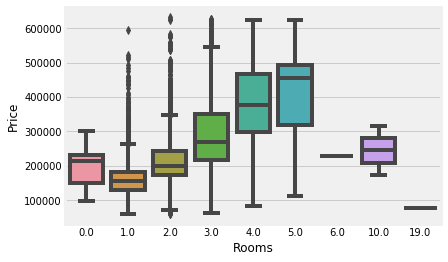

In [22]:
sns.boxplot(data['Rooms'], data['Price'])

In [23]:
data.groupby('Rooms')[['Square']].mean()

,Square
Rooms,
0.0,81.620358
1.0,41.323277
2.0,56.788214
3.0,76.903234
4.0,98.377544
5.0,122.614941
6.0,59.414334
10.0,59.964120
19.0,42.006046


In [24]:
min_LSquare = (train.loc[train['Square']<11]) 
room_1 = (train.loc[train['Rooms']==1])
room_2 = (train.loc[train['Rooms']==2])
room_3 = (train.loc[train['Rooms']==3])
room_4 = (train.loc[train['Rooms']==4])
room_5 = (train.loc[train['Rooms']>=5])

merged_zero_1 = pd.merge(min_LSquare, room_1, on='Id', how='inner')
merged_zero_2 = pd.merge(min_LSquare, room_2, on='Id', how='inner')
merged_zero_3 = pd.merge(min_LSquare, room_3, on='Id', how='inner')
merged_zero_4 = pd.merge(min_LSquare, room_4, on='Id', how='inner')
merged_zero_5 = pd.merge(min_LSquare, room_5, on='Id', how='inner')

merged_zero_3['Id']

0    13265
Name: Id, dtype: int64

In [25]:
def room_zero(df, room_5, room_3, room_2, room_1):
    df.loc[(df['Rooms'] == 0) & (df['Square'] >= room_5['Square'].mean()), 'Rooms'] = 5
    df.loc[(df['Rooms'] == 0) & (df['Square'] < room_5['Square'].mean())\
           & (data['Square']>room_3['Square'].mean()), 'Rooms'] = 4
    df.loc[(df['Rooms'] == 0) & (df['Square'] <= room_3['Square'].mean())\
           & (data['Square']>room_2['Square'].mean()), 'Rooms'] = 3
    df.loc[(df['Rooms'] == 0) & (df['Square'] <= room_2['Square'].mean())\
           & (data['Square']>room_1['Square'].mean()), 'Rooms'] = 2
    df.loc[(df['Rooms'] == 0) & (df['Square'] <= room_1['Square'].mean()), 'Rooms'] = 1
    return df

In [26]:
#train = room_zero(train)

In [27]:
train['Rooms'].value_counts()

2.0     2725
1.0     2594
3.0     1558
4.0      103
5.0       12
0.0        5
19.0       1
10.0       1
6.0        1
Name: Rooms, dtype: int64

#### Поменяем колличество комнат для 5-комнатных квартир, где Square<80

In [28]:
train.loc[(train['Rooms']==5) & (train['Square']<80)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
3271,6358,27,5.0,42.003293,NaN,0.0,5,12.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,112693.641769
4431,7594,53,5.0,39.906082,39.394024,1.0,5,1.0,1977,0.049637,B,B,34,7759,0,229.0,1,3,B,206148.845716


In [29]:
def max_rooms (df, room_5, room_3, room_1):
    df.loc[(df['Rooms'] >= 5) & (df['Square'] <= room_3['Square'].mean())\
           & (df['Square']>room_1['Square'].mean()), 'Rooms'] = 2
    df.loc[(df['Rooms'] >= 5) & (df['Square'] <= room_1['Square'].mean()), 'Rooms'] = 1
       
    return(df)

In [30]:
#train = max_rooms(train)

#### Square
Минимальное количество кв.м. на одного человека (Учетная норма) = 10 м2
*Источник: https://nedexpert.ru/kvartira/skolko-kvadratnyh-metrov-polozheno-na-cheloveka/ © Все о недвижимости*

Площадь самой маленькой квартиры в городах-миллионниках РФ составляет 11 кв м 
*Источник: https://realty.ria.ru/20170220/408370045.html* 

In [31]:
train.loc[(train['Square']<35)&(train['Rooms']==3)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
8030,13265,1,3.0,4.823679,79.767964,0.0,6,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,237716.681261
4739,12676,81,3.0,13.784865,15.988889,7.0,4,5.0,1960,0.319809,B,B,25,4756,16,2857.0,5,8,B,78388.806186
2247,16772,109,3.0,32.795221,36.659413,6.0,2,9.0,1979,0.136330,B,B,30,6141,10,262.0,3,6,B,173602.708629


In [32]:
train.loc[train['Square']>300]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
4262,28,9,2.0,604.705972,NaN,1.0,17,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,187717.242538
4690,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.430830


In [33]:
train.loc[((train['Square']>80)&(train['Rooms']==1), ['Price','Square','Rooms'])]

,Price,Square,Rooms
6094,223249.331500,103.744170,1.0
3260,217874.997452,160.647588,1.0
2881,160902.854650,148.179026,1.0
4525,476843.942405,105.619549,1.0
9589,509162.416594,106.260300,1.0
506,218718.046451,105.432181,1.0
1956,274139.065875,106.239622,1.0
5452,342223.033781,102.640234,1.0
4690,90470.430830,409.425181,1.0
7885,289034.391871,109.144492,1.0


In [34]:
room_4['Square'].describe()

count    103.000000
mean      98.651884
std       24.147415
min       63.147414
25%       83.828878
50%       98.686703
75%      106.348960
max      200.334539
Name: Square, dtype: float64

In [35]:
# логика 11 м2 описана выше. Rooms=2 берем ниже 25 м2 и Rooms=3  ниже 36 м2
# Так же рассмотрим однокомнатные квартиры с площадью более 70 м2. 
# Будем менять площадь на среднюю для всех, КРОМЕ: (['HouseYear']>=2000) , (['Floor']=1). 
# Будем считать эти квартиры: со свободной планировкой или что-то в этом роде. 
# Уберем квартиры с максимально большой площадью, но с обычной ценой.

def Square_metrs (df, room_1, room_2, room_3, ):
    df.loc[(df['Square']<11) & (df['Rooms']==1), 'Square'] = room_1['Square'].mean()
    df.loc[(df['Square']<25) & (df['Rooms']==2), 'Square'] = room_2['Square'].mean()
    df.loc[(df['Square']<36) & (df['Rooms']>2), 'Square'] = room_3['Square'].mean()
    
    df.loc[(df['Rooms'] == 1) & (df['HouseYear'] < 2000) & (df['Floor'] > 1) & (df['Square'].between(70, 100)), 'Square'] = room_1['Square'].mean()
    df.loc[(df['Rooms'] == 1) & (df['HouseYear'] < 2000) & (df['Floor'] > 1) & (df['Square']>100), 'Square'] = room_1['Square'].mean()
        
    df.loc[(df['Square']>200) & (df['Rooms']==1),'Square'] = room_1['Square'].mean()
    df.loc[(df['Square']>200) & (df['Rooms']==2),'Square'] = room_2['Square'].mean()
    return df                                                                           

#### LifeSquare + Square +KitchenSquare
Для построения удачной модели, нужно решить:
+ ['Square']<['LifeSquare']
+ ['LifeSquare'].isnull()=True
+ ['KitchenSquare'] < 10
+ ['LifeSquare'] < 10

In [36]:
train.loc[(train['LifeSquare'] + train['KitchenSquare']) > train['Square'],'Id'].count()

585

In [37]:
?sns.jointplot

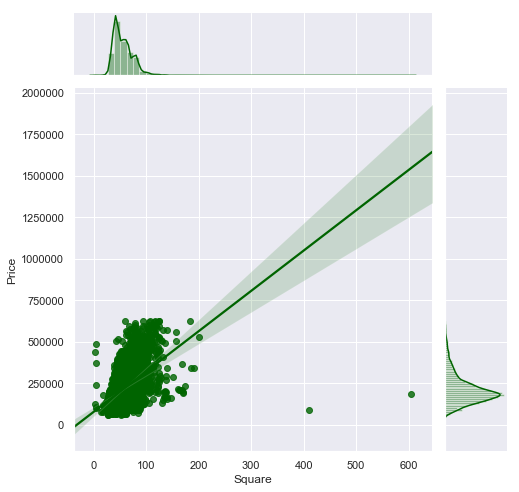

In [38]:
sns.set(style="darkgrid")

plot_sq = sns.jointplot("Square", "Price", data=train, kind="reg",
                 color="darkgreen", height=7)

In [39]:
data["LifeSquare"].isnull().sum()

2113

In [40]:
train["LifeSquare"].isnull().sum()

1486

In [41]:
# Посчитаем, на сколько среднее Square>LifeSquare ?

In [42]:
train.loc[(train['LifeSquare'] < train['Square']), ['Square' , 'LifeSquare']].mean()

Square        54.929394
LifeSquare    34.439964
dtype: float64

In [43]:
data.loc[(data['LifeSquare']) < data['Square'], ['Square' , 'LifeSquare']].mean()

Square        55.006667
LifeSquare    34.572353
dtype: float64

In [44]:
34/(55/100)

61.81818181818181

In [45]:
# Посчитаем, на сколько среднее Square>KitchenSquare ?

In [46]:
train.loc[(train['KitchenSquare']) < train['Square'], ['Square' , 'KitchenSquare']].mean()

Square           56.317428
KitchenSquare     5.902516
dtype: float64

In [47]:
data.loc[(data['KitchenSquare']) < data['Square'], ['Square' , 'KitchenSquare']].mean()

Square           56.322737
KitchenSquare     5.861545
dtype: float64

In [48]:
5.9/(56.22/100)

10.494485948061188

In [49]:
train.loc[train['LifeSquare']>200]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9910,16568,27,4.0,200.334539,201.627361,25.0,1,2.0,2013,0.041116,B,B,53,14892,4,NaN,1,4,B,528560.506016
4328,16550,27,3.0,81.694417,7480.592129,1.0,9,17.0,2016,0.017647,B,B,2,469,0,NaN,0,0,B,217357.492366
8437,15886,85,3.0,78.059331,461.463614,10.0,12,16.0,1998,0.037178,B,B,52,11217,1,2300.0,1,7,B,394253.299978
4690,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.430830


In [50]:
def NaN_LifeSquare(df):
    df['LifeSquare'] = df['LifeSquare'].fillna(0.6*df['Square'])
    
    df.loc[(df['KitchenSquare'] > 25) & (df['Square']<100), 'KitchenSquare'] = 0.15*df['Square']
    df.loc[(df['LifeSquare'] > 200) & (df['Square']<100), 'LifeSquare'] = 0.6*df['Square']
    
    df[['Square','LifeSquare']] = df[['LifeSquare','Square']].where(
            df['LifeSquare'] > df['Square'], df[['Square','LifeSquare']].values)
    df.loc[df['KitchenSquare'] > df['Square']*0.4 , 'KitchenSquare' ] = df['Square']*0.15
    df.loc[((df['LifeSquare'] + df['KitchenSquare']) > df['Square'])&\
              (df['Rooms']>2), 'KitchenSquare'] = df['KitchenSquare'] + df['Square']*0.15
    df.loc[df['KitchenSquare']>df['LifeSquare'], 'LifeSquare'] =\
            df['Square']- df['KitchenSquare']

    df.loc[(df['LifeSquare'] + df['KitchenSquare'])>df['Square'], 'LifeSquare']=\
            df['LifeSquare'] - df['KitchenSquare']
    df.loc[(df['LifeSquare'] < 10) & (df['KitchenSquare'] < 10), 'KitchenSquare'] = 0.15*df['Square']
    df.loc[(df['LifeSquare'] < 10) & (df['KitchenSquare'] < 11), 'LifeSquare'] = 0.6*df['Square']
    df.loc[(df['LifeSquare'] < 0.6*df['Square']) & (df['LifeSquare'] < 10), 'LifeSquare']=\
            0.6*df['Square']
    df.loc[(df['LifeSquare']<0.5*df['Square'])&(df['Rooms']>1)&\
              (df['KitchenSquare']<2), 'KitchenSquare'] = 0.15*df['Square']
    df.loc[df['KitchenSquare'].isnull(),'KitchenSquare'] =\
            (df['Square']-df['LifeSquare'])*0.5
    
    return df

In [51]:
#train = NaN_LifeSquare(train):

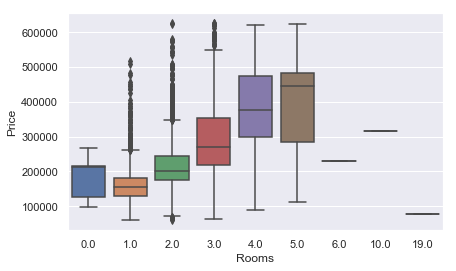

In [52]:
sns.boxplot(train['Rooms'], train['Price'])

#### ГОД

In [53]:
train.loc[train['HouseYear']<1900]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [54]:
mean_year = round(np.round(data.loc[data['HouseYear']<=2020, "HouseYear"].mean()))
mean_year

1985.0

In [55]:
def cleaning_yaer(df, mean_year):
    df.loc[df["HouseYear"]>2020, 'HouseYear'] = mean_year
    df.loc[df["HouseYear"]<1900, 'HouseYear'] = mean_year
    
    return df

In [56]:
# train = cleaning_yaer(train)

#### DistrictId

In [57]:
mean_price_all = train['Price'].mean()
mean_price_all 

214449.1673897029

In [58]:
room_5['Price'].mean()

351080.9561508783

In [59]:
train.loc[train['Rooms']==5,'Price'].mean()

386743.5364459026

In [60]:
mean_price = train.groupby(['DistrictId', 'Rooms'], as_index=False)[['Price']].mean().\
    rename(columns={'Price':'mean_price'})

In [61]:
fix_price = train.groupby('Rooms', as_index=False)[['Price']].mean().\
    rename(columns={'Price':'fix_price'})

In [62]:
def add_mean_price(df, mean_price, fix_price):
    global mean_price_all
    df = pd.merge(df, fix_price, on='Rooms', how='left')
    df['fix_price'] = df['fix_price'].fillna(mean_price_all)
    df = pd.merge(df, mean_price, on=['DistrictId', 'Rooms'], how='left')
    df['mean_price'] = df['mean_price'].fillna(df['fix_price'])
    df = df.drop('fix_price', axis=1)
    return df

In [63]:
#train = add_mean_price (train)

#### prepare_data
Ковертация признаков типа STR в INT
Заполнение пропущенных NaN значений в Healthcare 
объединение фун-й

In [64]:
healthcare_1_mean = np.float64(train.loc[train['Healthcare_1'].notnull(), 'Healthcare_1'].mean())

In [65]:
def feats_conversion (df, healthcare_1_mean):
    df.loc[df['Ecology_2'] == 'A', 'Ecology_2'] = 1
    df.loc[df['Ecology_2'] == 'B', 'Ecology_2'] = 2
    df.loc[df['Ecology_3'] == 'A', 'Ecology_3'] = 1
    df.loc[df['Ecology_3'] == 'B', 'Ecology_3'] = 2
    df.loc[df['Shops_2'] == 'A', 'Shops_2'] = 1
    df.loc[df['Shops_2'] == 'B', 'Shops_2'] = 2
    df.loc[df['Healthcare_1'].isnull(), 'Healthcare_1'] = healthcare_1_mean
    return df

In [66]:
#train = feats_conversion (train)

In [67]:
def prepare_data_clean (df, room_5=room_5, room_3=room_3, room_2=room_2, room_1=room_1, room_4=room_4, mean_year=mean_year, mean_price=mean_price, fix_price=fix_price, healthcare_1_mean=healthcare_1_mean):
    df = clean_floor(df)
    df = room_zero(df, room_5, room_3, room_2, room_1)
    df = max_rooms (df, room_5, room_3, room_1)
    df = Square_metrs (df, room_1, room_2, room_3)
    df = NaN_LifeSquare(df)
    df = cleaning_yaer(df, mean_year)
    df = add_mean_price (df, mean_price, fix_price)
    df = feats_conversion (df, healthcare_1_mean)
    return df

In [68]:
train = prepare_data_clean(train)

In [69]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,mean_price
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,8386.061714,50.560857,1.886143,56.283695,36.007030,6.071287,7.724714,13.473000,1984.918429,0.117840,1.990857,1.971143,24.767571,5364.425714,8.044571,1133.876167,1.313143,4.260571,1.916571,214449.167390,214465.594681
std,4864.141324,43.744178,0.808783,18.854999,14.723417,4.393205,5.272196,6.091727,18.306843,0.118599,0.095187,0.167417,17.583889,4011.768297,23.869975,734.499360,1.488326,4.825024,0.276549,92924.798790,75727.351306
min,0.000000,0.000000,1.000000,16.117154,9.670293,0.000000,1.000000,1.000000,1912.000000,0.000000,1.000000,1.000000,0.000000,168.000000,0.000000,30.000000,0.000000,0.000000,1.000000,59174.778028,84250.557673
25%,4176.500000,19.000000,1.000000,41.819248,24.477434,1.000000,4.000000,9.000000,1974.000000,0.017647,2.000000,2.000000,6.000000,1564.000000,0.000000,825.000000,0.000000,1.000000,2.000000,154599.240157,165911.129700
50%,8398.500000,37.000000,2.000000,52.726877,33.228293,6.000000,7.000000,14.000000,1977.000000,0.075424,2.000000,2.000000,25.000000,5285.000000,2.000000,1133.876167,1.000000,3.000000,2.000000,192290.039215,198197.383850
75%,12562.000000,75.000000,2.000000,66.068815,44.283538,9.000000,11.000000,17.000000,2001.000000,0.194489,2.000000,2.000000,36.000000,7227.000000,5.000000,1133.876167,2.000000,6.000000,2.000000,249080.956886,249140.409925
max,16796.000000,209.000000,5.000000,201.627361,162.587886,63.847123,42.000000,95.000000,2020.000000,0.521867,2.000000,2.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,2.000000,627525.072788,595128.195352


In [70]:
valid = prepare_data_clean (valid)

In [71]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 21 columns):
Id               3000 non-null int64
DistrictId       3000 non-null int64
Rooms            3000 non-null float64
Square           3000 non-null float64
LifeSquare       3000 non-null float64
KitchenSquare    3000 non-null float64
Floor            3000 non-null float64
HouseFloor       3000 non-null float64
HouseYear        3000 non-null float64
Ecology_1        3000 non-null float64
Ecology_2        3000 non-null int64
Ecology_3        3000 non-null int64
Social_1         3000 non-null int64
Social_2         3000 non-null int64
Social_3         3000 non-null int64
Healthcare_1     3000 non-null float64
Helthcare_2      3000 non-null int64
Shops_1          3000 non-null int64
Shops_2          3000 non-null int64
Price            3000 non-null float64
mean_price       3000 non-null float64
dtypes: float64(11), int64(10)
memory usage: 515.6 KB


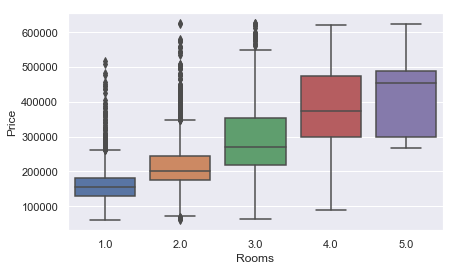

In [72]:
sns.boxplot(train['Rooms'], train['Price'])
sns.set(style="darkgrid")

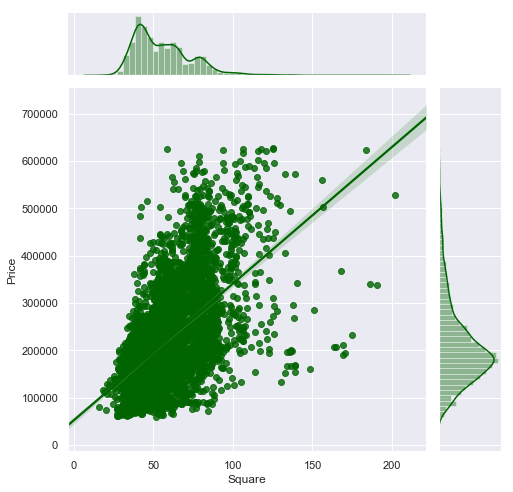

In [73]:
plot_sq = sns.jointplot("Square", "Price", data=train, kind="reg",
                 color="darkgreen", height=7)

# MODEL

Загрузим RandomForestRegressor из библиотеки sklearn
Запишим параметры для построения модели в feats
Создайте модель GridSearchCV

In [74]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import GridSearchCV

In [75]:
from sklearn.metrics import r2_score as r2

In [76]:
feats = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor',
        'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
       'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2', 'mean_price']


In [77]:
model = RFR(n_estimators=100, max_depth=50, max_features=9, random_state=42)

In [78]:
model.fit(train.loc[:, feats], train['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features=9, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [79]:
pred_train = model.predict(train.loc[:, feats])

In [80]:
pred_valid = model.predict(valid.loc[:, feats])

In [81]:
r2(train['Price'], pred_train)

0.967229303729973

In [82]:
r2(valid['Price'], pred_valid)

0.7005877111858148

# TEST

In [83]:
test = pd.read_csv('input/test.csv')

In [84]:
test = prepare_data_clean (test)

In [86]:
test['Price'] = model.predict(test.loc[:, feats])

In [111]:
test.shape

(5000, 21)

In [85]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,mean_price
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,8412.595400,51.279200,1.90820,56.562351,36.210712,6.092072,7.86420,13.394200,1984.392600,0.119874,1.990400,1.970200,24.933800,5406.900000,8.262600,1140.581130,1.31940,4.242800,1.917600,215071.854005
std,4832.674037,44.179466,0.81062,18.974731,14.594288,4.241545,5.41956,6.221201,18.573149,0.120070,0.097518,0.170052,17.532202,4026.614773,23.863762,756.659018,1.47994,4.777365,0.275001,73370.760014
min,1.000000,0.000000,1.00000,13.305531,7.983319,0.000000,1.00000,1.000000,1908.000000,0.000000,1.000000,1.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,1.000000,84250.557673
25%,4221.750000,21.000000,1.00000,41.957158,24.740985,1.000000,4.00000,9.000000,1973.000000,0.019509,2.000000,2.000000,6.000000,1564.000000,0.000000,810.000000,0.00000,1.000000,2.000000,166244.711598
50%,8320.500000,37.000000,2.00000,52.921340,33.420567,6.000000,7.00000,14.000000,1977.000000,0.072158,2.000000,2.000000,25.000000,5285.000000,2.000000,1133.876167,1.00000,3.000000,2.000000,198775.648383
75%,12598.250000,77.000000,2.00000,66.381272,44.635679,9.000000,11.00000,17.000000,2000.000000,0.195781,2.000000,2.000000,36.000000,7287.000000,5.000000,1133.876167,2.00000,6.000000,2.000000,247244.824542
max,16795.000000,212.000000,6.00000,223.453689,168.729035,42.000000,46.00000,95.000000,2020.000000,0.521867,2.000000,2.000000,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,2.000000,570525.064275


In [87]:
test.loc[:, ['Id', 'Price']].to_csv('DZamolotskii_predictions.csv', index=False)